# Point Based Registration

Imagine you have collected points

* 3 points, of anatomical locations, in a CT scan
* 3 points, of the same anatomical locations, using a tracked pointer

The first 3 points use image co-ordinates, the second set of 3 points use tracker coordinates. In order to use image data in the tracker coordinate system, we must find a transformation that will map between image and tracker coordinates.

In [4]:
%matplotlib inline

In [16]:
# All imports for this notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sksurgerycore.algorithms.procrustes as pbr
import sksurgerycore.transforms.matrix as mu
import sys
sys.path.append("../../")

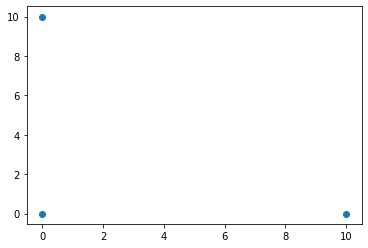

In [4]:
# Define 3 points, as if they were in an image
image_points = np.zeros((3,3))
image_points[0][0] = 0
image_points[0][1] = 0
image_points[0][2] = 0
image_points[1][0] = 10
image_points[1][1] = 0
image_points[1][2] = 0
image_points[2][0] = 0
image_points[2][1] = 10
image_points[2][2] = 0

# Draw them in 2D. Its a triangle.
plt.scatter(image_points[:,0], image_points[:,1])
plt.show()

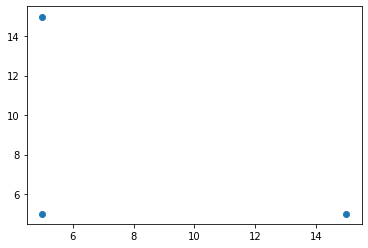

In [5]:
# Define 3 points, as if they were in tracker space
tracker_points = np.zeros((3,3))
tracker_points[0][0] = 5
tracker_points[0][1] = 5
tracker_points[0][2] = -1000
tracker_points[1][0] = 15
tracker_points[1][1] = 5
tracker_points[1][2] = -1000
tracker_points[2][0] = 5
tracker_points[2][1] = 15
tracker_points[2][2] = -1000

# Draw them in 2D. Its a triangle, same point order, different location.
plt.scatter(tracker_points[:,0], tracker_points[:,1])
plt.show()

In [17]:
# Compute Transformation from image to tracker
R, t, FRE = pbr.orthogonal_procrustes(tracker_points, image_points)
T = mu.construct_rigid_transformation(R,t)

In [18]:
print(R)
print(t)
print(FRE)
print(T)

[[ 1.00000000e+00 -4.26642159e-17  0.00000000e+00]
 [ 3.58404070e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[    5.]
 [    5.]
 [-1000.]]
1.4503892858778862e-15
[[ 1.00000000e+00 -4.26642159e-17  0.00000000e+00  5.00000000e+00]
 [ 3.58404070e-17  1.00000000e+00  0.00000000e+00  5.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -1.00000000e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [19]:
# Construct inverse
R2, t2, FRE2 = pbr.orthogonal_procrustes(image_points, tracker_points)
T2 = mu.construct_rigid_transformation(R2,t2)
print(np.matmul(T,T2))

[[ 1.00000000e+00 -8.53284318e-17  0.00000000e+00 -2.66453526e-15]
 [ 7.16808141e-17  1.00000000e+00  0.00000000e+00 -2.66453526e-15]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  9.09494702e-13]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [20]:
# Add noise to 1 point, recalculate, look at FRE
image_points[0][0] = 1
R, t, FRE = pbr.orthogonal_procrustes(tracker_points, image_points)
print(FRE)

0.44015551225972854


In [30]:
# Transform image points into tracker space
transformed_image_points = np.transpose(np.matmul(R, np.transpose(image_points)) + t)
print(transformed_image_points)

[[    5.58210085     5.06944883 -1000.        ]
 [   14.57914373     4.83875543 -1000.        ]
 [    4.83875543    15.09179574 -1000.        ]]


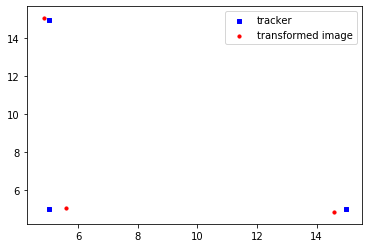

In [31]:
# Plot tracker points and transformed image points
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(tracker_points[:,0], tracker_points[:,1], s=10, c='b', marker="s", label='tracker')
ax1.scatter(transformed_image_points[:,0], transformed_image_points[:,1], s=10, c='r', marker="o", label='transformed image')
plt.legend(loc='upper right');
plt.show()